# Implementing Decision Function of SVM RBF Kernel


### What category of algorithms does Support Vector Machines classification belong to?

Support Vector Machines (SVMs) are most frequently used for solving classification problems, which fall under the supervised machine learning category. However, with small adaptations, SVMs can also be used for other types of problems such as:

- **Clustering (unsupervised learning)** through the use of Support Vector Clustering algorithm

- **Regression (supervised learning)** through the use of Support Vector Regression algorithm (SVR)

---

### SVM classification algorithm — a brief explanation

Let’s assume we have a set of points that belong to two separate classes. We want to separate those two classes in a way that allows us to correctly assign any future new points to one class or the other.

SVM algorithm attempts to find a hyperplane that separates these two classes with the highest possible margin. If classes are fully linearly separable, a hard-margin can be used. Otherwise, it requires a soft-margin.

Note, the points that end up on the margins are known as support vectors.

![Imgur](https://imgur.com/gVpvenz.png)


Hyperplane called “H1” cannot accurately separate the two classes; hence, it is not a viable solution to our problem.

The “H2” hyperplane separates classes correctly. However, the margin between the hyperplane and the nearest blue and green points is tiny. Hence, there is a high chance of incorrectly classifying any future new points. E.g., the new grey point (x1=3, x2=3.6) would be assigned to the green class by the algorithm when it is obvious that it should belong to the blue class instead.

Finally, the “H3” hyperplane separates the two classes correctly and with the highest possible margin (yellow shaded area). Solution found!
Note, finding the largest possible margin allows more accurate classification of new points, making the model a lot more robust. You can see that the new grey point would be assigned correctly to the blue class when using the “H3” hyperplane.

---


### Radial Basis Function (RBF) kernel and Python examples

RBF is the default kernel used within the sklearn’s SVM classification algorithm and can be described with the following formula:


![Imgur](https://imgur.com/eLqLPD2.png)


$||x - x'||²$ is the squared Euclidean distance between two feature vectors (2 points).

Gamma is a scalar that defines how much influence a single training example (point) has. 

---

### General Description of Decision Function in Machine Learning 

[Source](https://www.geeksforgeeks.org/ml-decision-function/)

Decision function is a method present in classifier{ SVC, Logistic Regression } class of sklearn machine learning framework. This method basically returns a Numpy array, In which each element represents whether a predicted sample for x_test by the classifier lies to the right or left side of the Hyperplane and also how far from the HyperPlane.

It also tells us that how confidently each value predicted for x_test by the classifier is Positive ( large-magnitude Positive value ) or Negative ( large-magnitude Negative value).

Math behind the Decision Function method:
Let’s consider the SVM for linearly-separable binary class classification problem:

**Cost Function:**

![Imgur](https://imgur.com/awpwVRv.png)

### What Actually happens when we pass a data instance to Decision Function method ?

This data sample is substituted in this hypothesis whose model parameters have been found by minimizing the cost function and returns the value outputted by this hypothesis which would be >1 if actual output is 1 or <-1 if the actual output is 0. This returned value indeed represents on which side of the hyperplane and also how far from it the given data sample lie.

Overall, Decision Function output represents whether a predicted sample for x_test by the classifier lies to the right side or left side of hyperplane and also how far from it. It also tells us how confidently each value predicted for x_test by the classifier is Positive ( large-magnitude Positive value ) or Negative ( large-magnitude Negative value)

---


After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check below scikit-learn documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

<img src='https://i.imgur.com/K11msU4.png' width=500>

Here we will be implementing the *`decision_function()`* of kernel SVM, and the *`decision_function()`* here means that, based on the value return by *`decision_function()`* the model will classify the data point either as positive or negative.

For example, In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value 

### $$\frac{1}{1+\exp(-(wx+b))}$$, 

If this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Another Example In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 

### $sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$

is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: 

# $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding [refer here](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation)
</font>

#### Now here's our workflow

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'># code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)

---


### A note on what is dual_coef in SVC

In your `clf`, 

`coef_` are the weights assigned to the features; (Note it only works for linear SVM)

 `support_vectors_` and `support_` are the support vectors and the corresponding index;

`dual_coef_` is the coefficients of the support vector in the decision function; and 

`intercept_` is the bias in decision function.

In linear SVM, $w^Tx+b=0$ is the decision boundary, and $w$ is the coefficients of the support vectors, $b$ is the bias, all defined above.

#### Some more on dual_coef if SVC from [here](https://stackoverflow.com/questions/22816646/the-dimension-of-dual-coef-in-sklearn-svc)


The dual coefficients of a sklearn.svm.SVC in the multiclass setting are tricky to interpret. There is an explanation in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#multi-class-classification). The sklearn.svm.SVC uses [libsvm](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) for the calculations and adopts the same data structure for the dual coefficients. Another explanation of the organization of these coefficients is in the [FAQ](http://www.csie.ntu.edu.tw/~cjlin/libsvm/faq.html#f402). In the case of the coefficients you find in the fitted SVC classifier, interpretation goes as follows:

The support vectors identified by the SVC each belong to a certain class. In the dual coefficients, they are ordered according to the class they belong to.
Given a fitted SVC estimator, e.g.

    from sklearn.svm import SVC
    svc = SVC()
    svc.fit(X, y)

you will find

    svc.classes_   # represents the unique classes
    svc.n_support_ # represents the number of support vectors per class


#### From official guide - dual_coef

dual_coef_ => ndarray of shape (n_classes -1, n_SV)

Dual coefficients of the support vector in the decision function (see Mathematical formulation), multiplied by their targets. For multiclass, coefficient for all 1-vs-1 classifiers. 

### RBF Kernel Notes


||x - x'||² is the squared Euclidean distance between two feature vectors (2 points).
Gamma is a scalar that defines how much influence a single training example (point) has.


### C Parameter

It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly. Large value of c means you will get more intricate decision curves trying to fit in all the points.


### Gamma Parameter

It defines how far the influence of a single training example reaches. If it has a low value it means that every point has a far reach and conversely high value of gamma means that every point has close reach.

If gamma has a very high value, then the decision boundary is just going to be dependent upon the points that are very close to the line which effectively results in ignoring some of the points that are very far from the decision boundary. This is because the closer points get more weight and it results in a wiggly curve as shown in previous graph.On the other hand, if the gamma value is low even the far away points get considerable weight and we get a more linear curve.


---


### Now the code for this


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

x, x_test, y, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

X_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.25, train_size = 0.75)

clf = SVC(gamma=0.001, C=100.)

clf.fit(X_train, y_train)

dual_coeff = clf.dual_coef_[0]

support_vectors = clf.support_vectors_

print('dual_coeff.shape ', dual_coeff.shape)
print('support_vectors ', support_vectors.shape)

intercept = clf.intercept_

print('intercept ', intercept)

dual_coeff.shape  (546,)
support_vectors  (546, 5)
intercept  [2.33183324]


In [4]:
def decision_function(Xcv):
  sample_output_rbf = 0
  y_predicted = []
  gamma = clf._gamma
  
  for x_q in Xcv:
    kernel_sum = 0
    for i in range(len(support_vectors)):
      squared_distance = (np.linalg.norm(support_vectors[i] - x_q)**2)
      rbf_k = np.exp(-gamma * (squared_distance))
      kernel_sum += dual_coeff[i]*rbf_k    
    
    sample_output_rbf = kernel_sum + intercept
    y_predicted.append(sample_output_rbf[0])
    
  return np.array(y_predicted)    
      

In [5]:
svm_decision_inbuilt_result_x_cv = clf.decision_function(x_cv)
# svm_decision_inbuilt_result_x_cv = clf.decision_function(x_test)
# svm_decision_inbuilt_result_x_test = clf.decision_function(x_test)
# print('x_test.shape x', svm_decision_inbuilt_result_x_test.shape)

print('inbuilt_decision_function: first 5 elements ', svm_decision_inbuilt_result_x_cv[:5] )

custom_decision_function_result_x_cv = decision_function(x_cv)
print('custom_decision_function_result: first 5 elements ', custom_decision_function_result_x_cv[:5])

inbuilt_decision_function: first 5 elements  [-1.85244347 -4.23656834 -3.36141632 -3.15123116 -4.12626119]
custom_decision_function_result: first 5 elements  [-1.85244347 -4.23656834 -3.36141632 -3.15123116 -4.12626119]


# Implementing Platt Scaling to find P(Y==1|X)

Here we will be doing the following


- Applying SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

- Note1: We have to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

- Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs. We have to use below logrithmic transformation

<img src='https://i.imgur.com/zKYE9Oc.png'>

if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

- Finally, for a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

Check this paper for reference on [Platt Scaling and Isotonic Regression.](https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a)


<img src='https://i.imgur.com/CAMnVnh.png'>




In [6]:
# Randomly initializing weights (w) and intercept values (b)
# dim — size of the w vector we want (or number of features or parameters in this case)
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias
    w — weights, a numpy array of size
    b — bias, a scalar
    '''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    # Above will initialize all w with 0.
    b = 0
    return w,b
  
def sigmoid(z):
    return 1.0/(1 + np.exp(-z)) 



def logloss(y_true, y_pred):
    
    len_y_true = len(y_true)
    
    number_of_plus = np.count_nonzero(y_true == 1)
    number_of_minus = np.count_nonzero(y_true == 0)
    
    y_plus = (number_of_plus+1)/(number_of_minus+2)
    y_minus = 1/(number_of_minus+2)
    
    sum_of_loss = 0
    
    for i in range(0, len_y_true):
      if (y_true[i] == 1):
        sum_of_loss += ((y_plus * np.log10(y_pred[i])) + ((1- y_plus) * np.log10(1-y_pred[i])))
      else:
        sum_of_loss += ((y_minus * np.log10(y_pred[i])) + ((1 - y_minus) * np.log10(1-y_pred[i])))
        
    loss = (-1/len_y_true) * sum_of_loss  
    return loss
    
    
  
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw
  
  
def gradient_db(x,y,w,b):
    z = np.dot(w, x) + b
    db = y - sigmoid(z)

    return db

In [7]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    """ In this function, we will implement logistic regression"""
    # Here eta0 is learning rate
    # implement the code as follows
    # initialize the weights (call the initialize_weights(X_train[0]) function)
    w, b = initialize_weights(X_train[0])
    # for every epoch
    train_loss = []
    test_loss = []
    N = len(X_train)

    loss_threshold = 0.0001

    for epoch in range(epochs):
        # for every data point(X_train,y_train)
        for row in range(N - 1):
            # compute gradient w.r.to w (call the gradient_dw() function)
            delta_weights = gradient_dw(
                X_train[row], y_train[row], w, b, alpha, len(X_train)
            )

            # compute gradient w.r.to b (call the gradient_db() function)
            delta_bias = gradient_db(X_train[row], y_train[row], w, b)

            # update w, b
            w = w + eta0 * delta_weights
            b = b + eta0 * delta_bias

        # predict the output of x_train[for all data points in X_train] using w,b
        # y_prediction_train is a numpy array (vector) containing all predictions (0/1) for the examples in X
        y_prediction_train = [  
        sigmoid(np.dot(w, x_row) + b) for x_row in X_train
        ]

        # compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        train_loss.append(logloss(y_train, y_prediction_train))

        # predict the output of x_test[for all data points in X_test] using w,b
        y_prediction_test = [
            sigmoid(np.dot(w, x_row) + b) for x_row in X_test
        ]

        print(
            f"For EPOCH No : {epoch} Train Loss is : {logloss(y_train, y_prediction_train)} and Test Loss is : {logloss(y_test, y_prediction_test)}"
        )

        # compute the loss between predicted and actual values (call the loss function)
        test_loss.append(logloss(y_test, y_prediction_test))

      

    return w, b, train_loss, test_loss

In [8]:
alpha=0.0001
eta0=0.0001
# N=len(X_train)
epochs=50

w, b, cv_log_loss, test_loss = train(custom_decision_function_result_x_cv, y_cv, x_test, y_test, epochs, alpha, eta0)
print('w_coef ', w)
print('intercept b ', b)

For EPOCH No : 0 Train Loss is : 0.2710610406358637 and Test Loss is : [0.29884728 0.2992636  0.30152214 0.30237133 0.28943891]
For EPOCH No : 1 Train Loss is : 0.24910931184003132 and Test Loss is : [0.29777406 0.29871392 0.30215838 0.30380725 0.28013576]
For EPOCH No : 2 Train Loss is : 0.23288264544617943 and Test Loss is : [0.29747904 0.29899958 0.3028957  0.30529273 0.27259011]
For EPOCH No : 3 Train Loss is : 0.22073217358551833 and Test Loss is : [0.29772793 0.29985471 0.30370263 0.30679862 0.26639499]
For EPOCH No : 4 Train Loss is : 0.21150997309733618 and Test Loss is : [0.29835816 0.30109753 0.30455661 0.30830643 0.2612464 ]
For EPOCH No : 5 Train Loss is : 0.20442223640473065 and Test Loss is : [0.2992571  0.30260404 0.30544158 0.30980458 0.25691872]
For EPOCH No : 6 Train Loss is : 0.19891629786651815 and Test Loss is : [0.30034614 0.304289   0.30634611 0.31128592 0.25324363]
For EPOCH No : 7 Train Loss is : 0.19460224664607043 and Test Loss is : [0.30156976 0.30609327 0.3

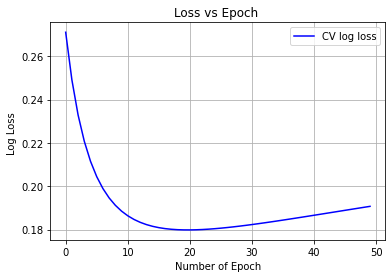

In [9]:
x = np.array([i for i in range(0, 50)])

cv_log_loss_arr = np.array(cv_log_loss)

plt.plot(x, cv_log_loss_arr, "-b", label = 'CV log loss')

plt.legend(loc="upper right")
plt.grid()

plt.xlabel('Number of Epoch')
plt.ylabel('Log Loss ')

plt.title('Loss vs Epoch ')
plt.show()

### Implementing the custom decision funtion on x_test

In [10]:
custom_decision_function_result_x_test = decision_function(x_test)
print('Shape of custom_decision_function_result_x_test ', custom_decision_function_result_x_test.shape)

prob_arr_x_test_custom_decision_func = []

for i in custom_decision_function_result_x_test:
  i_proba = 1/(1 + np.exp((-w * i) - b) )
  prob_arr_x_test_custom_decision_func.append(i_proba)
  
  
print('First 5 elements prob_arr_x_test_custom_decision_func ', prob_arr_x_test_custom_decision_func[:5])



Shape of custom_decision_function_result_x_test  (1000,)
First 5 elements prob_arr_x_test_custom_decision_func  [0.06530148068064014, 0.03790157324095724, 0.28405713154541296, 0.06839044552468132, 0.051415767200302775]
